# Quickstart

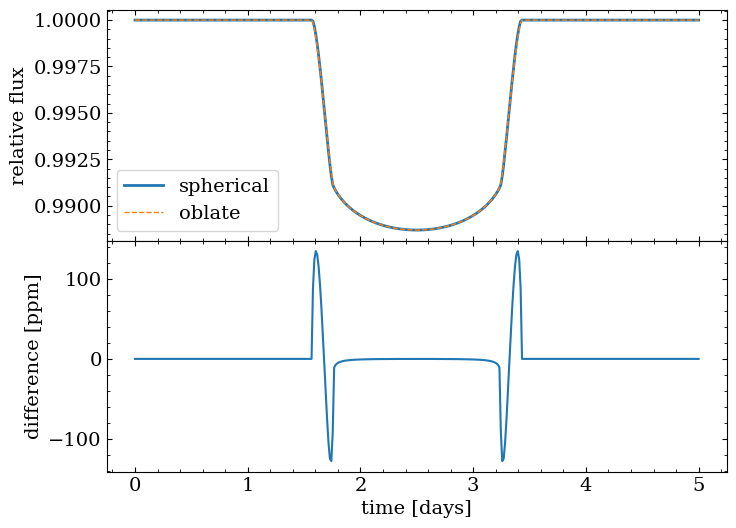

In [1]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from squishyplanet import OblateSystem
import matplotlib.pyplot as plt

state = {
    "t_peri" : 0.0,
    "times" : jnp.linspace(0.0, 5, 400),
    "a" : 2.0,
    "period" : 10,
    "r" : 0.1,
    "ld_u_coeffs":jnp.array([0.3, 0.1]),}
planet = OblateSystem(**state)

spherical_lc = planet.lightcurve()

# for this demo where the goal is to make the curves as similar as possible,
# when we flatten the planet by setting f1 = 0.1, we also need to adjust the equatorial
# radius to keep the projected area the same, otherwise the depth of the transit
# will change
oblate_lc = planet.lightcurve({"r" : 0.1/jnp.sqrt((1-0.1)), "f1" : 0.1})

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
ax[0].plot(planet.state["times"], spherical_lc, lw=2, label="spherical")
ax[0].plot(planet.state["times"], oblate_lc, lw=1, linestyle="--", label="oblate")
ax[0].set(ylabel="relative flux")
ax[0].legend()
ax[1].plot(planet.state["times"], (spherical_lc - oblate_lc)*1e6)
ax[1].set(xlabel="time [days]", ylabel="difference [ppm]")

fig.subplots_adjust(hspace=0);
